# SNLO: Pulses Tutorial

Her

In [1]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt


import snlo.pulses as pulses

from scipy.constants import pi, c, epsilon_0
nm = 1e-9
um = 1e-6
mm = 1e-3
ps = 1e-12
fs = 1e-15
MHz = 1e6
GHz = 1e9
THz = 1e12
pJ = 1e-12
fJ = 1e-15
mW = 1e-3

#Larger font for plots
plt.rcParams.update({'font.size': 18})

In [2]:
wl_ff = 2090*nm #Fundamental wavelength
f0_ff = c/wl_ff

#Let's set the bandwdith
f_max = c/(800*nm)
f_min = c/(4.5*um)
BW = f_max - f_min 

#Now we can create the time and frequency arrays
NFFT = 2**9
Tmax = NFFT/BW
dt = 1/BW
t_start = -Tmax/2
t_stop = t_start + NFFT*dt
t = np.arange(t_start, t_stop, step=dt)
f = fftfreq(NFFT, dt)
Omega = 2*pi*f
df = f[1]-f[0]

#Reference frequency
f_ref = (f_min + f_max)/2
wl_ref = c/f_ref
omega_ref = 2*pi*f_ref

## Creating a pulse

In [3]:
#Average Power
Pcw = 10*mW

#Pulse width:
tau = 80*fs

#Peak power:
frep = 250*MHz
Ppeak = Pcw / ( frep*tau )

#Pulse creation
N_dB = 100
# pump = pulses.gaussian_pulse(t, tau, Ppeak=Ppeak, f_ref=f_ref, f0=f0_ff, Npwr_dB=N_dB, frep=frep)
pump = pulses.sech_pulse(t, tau, Ppeak=Ppeak, f_ref=f_ref, f0=f0_ff, Npwr_dB=-N_dB, frep=frep)

## Some functions

In [4]:
print('Pulse Energy = %0.3f pJ' %(pump.energy_td()/pJ)) #integrated in the time domain
print('Pulse Energy = %0.3f pJ' %(pump.energy_fd()/pJ)) #integrated in the frequency domain
print('Peak Power = %0.3f W' %( np.amax(np.abs(pump.a)**2) )) #manually finding the peak
print('Center of pulse = %0.3f ps' %( pump.time_center()/ps ) )
print('Pulse width FWHM = %0.3f fs' %( pump.width_FWHM()/fs ) )

Pulse Energy = 45.455 pJ
Pulse Energy = 45.455 pJ
Peak Power = 499.996 W
Center of pulse = -0.000 ps
Pulse width FWHM = 80.164 fs


# Plotting functions

# Time domain

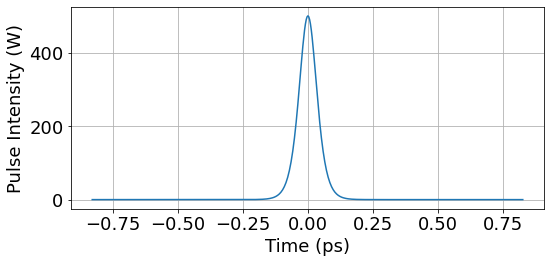

In [5]:
fig, ax1 = plt.subplots(figsize=(8,4), tight_layout=True)
ax1 = pump.plot_magsq(ax=ax1, t_unit='ps')

## Frequency Domain

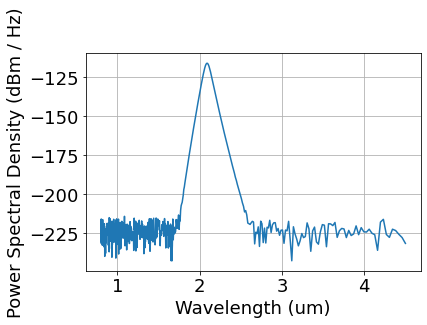

In [6]:
ax1 = pump.plot_PSD()

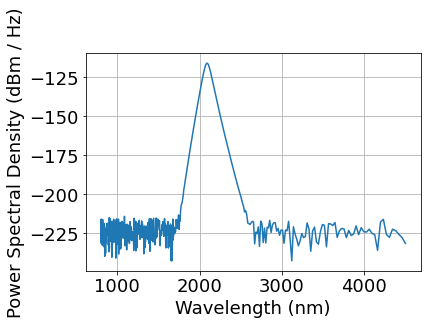

In [7]:
ax1 = pump.plot_PSD(f_unit = 'nm')

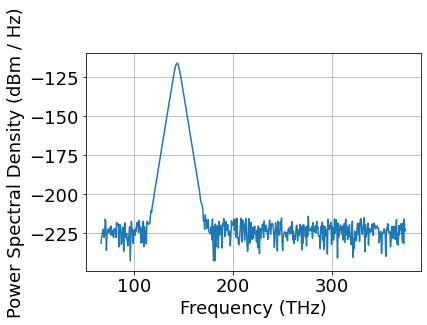

In [8]:
ax1 = pump.plot_PSD(f_unit = 'THz')

## Can also request linear units

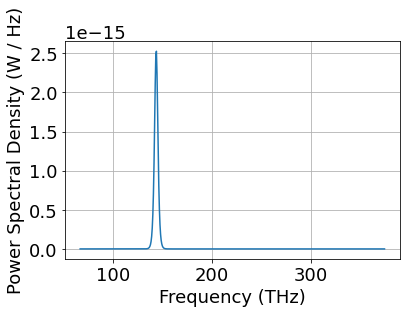

In [9]:
ax1 = pump.plot_PSD(f_unit = 'THz', dBm=False)

# Other features

### Move a pulse in the time domain

Center of pulse = 0.000 ps
Center of pulse = -0.100 ps


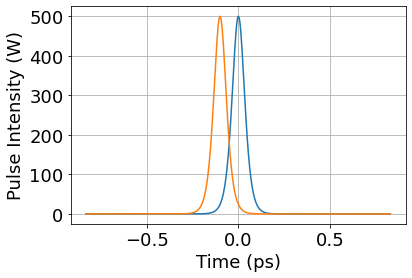

In [10]:
pump2= pulses.sech_pulse(t, tau, Ppeak=Ppeak, f_ref=f_ref, f0=f0_ff, Npwr_dB=-N_dB, frep=frep)
ax1 = pump2.plot_magsq()
print('Center of pulse = %0.3f ps' %( pump2.time_center()/ps ) )

#Now move it
pulses.add_t_offset(pump2, 0.1*ps)
ax1 = pump2.plot_magsq(ax = ax1)
print('Center of pulse = %0.3f ps' %( pump2.time_center()/ps ) )

### Add two pulses

Center of pulse = -0.100 ps


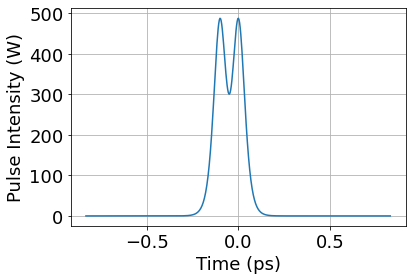

In [11]:
pump3 = pump + pump2
ax1 = pump3.plot_magsq()
print('Center of pulse = %0.3f ps' %( pump2.time_center()/ps ) )

### Can also multiply by complex scalars

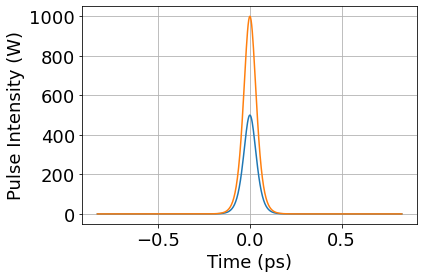

In [12]:
pump4 = (1+1j)*pump
ax1 = pump.plot_magsq()
ax1 = pump4.plot_magsq(ax = ax1)

### And even by other pulses

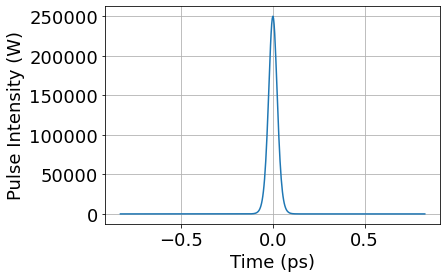

In [13]:
pump5 = pump*pump
ax1 = pump5.plot_magsq()